# Customer Churn Analysis<br><br><br><br>
**Problem Statement:**<br><br><br>
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.<br><br>

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.<br><br>

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. <br><br>

In this problem, we are going to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. <br><br><br>

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### Loading the dataset

In [3]:
df=pd.read_csv("customer_churn_analysis")

### Exploratory Data Analysis

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


This shows the first five rows of the dataset.

In [5]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns in the dataset.

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We can see all the column names here.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.<br>
* We can see that there is one column of datatype float64, two columns of int64 and 18 columns of object datatype.

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see the statistical distribution of the data here. This shows the description of numerical valued columns only.

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

We can see that 1869 customers stopped using the service(i.e., there is churn) and 5174 are continuing the services with the company(there is no churn).

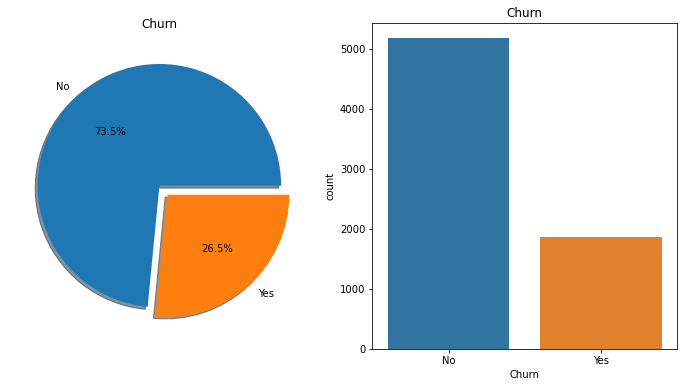

In [11]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

* Pie chart showing the percentage of Customers who left the company and who are with the company.<br>
  --We can see that there is 26.5 percent churn.
* Barplot shows the number of customers who left the company and who are with the company.

**gender**

In [12]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

We can see that there are 3555 male customers and 3488 female customers.

**Checking Churn by gender**

Text(0.5, 1.0, 'gender vs Churn')

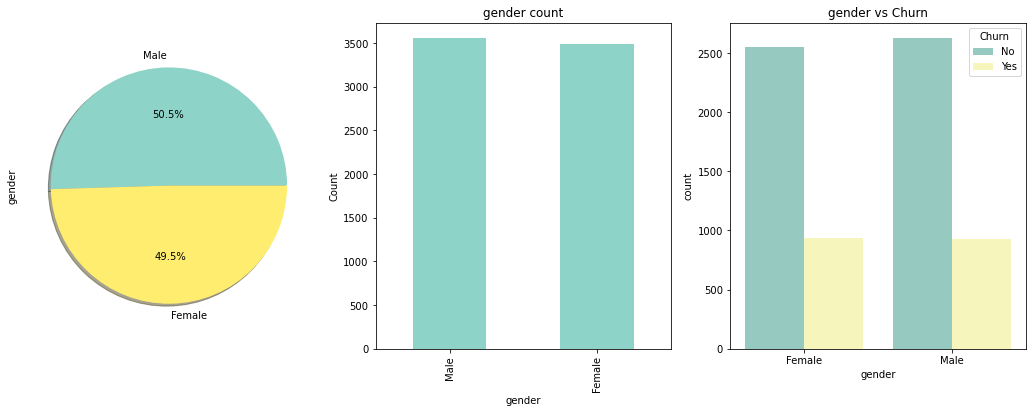

In [13]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['gender'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('gender count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('gender')
sns.countplot('gender', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('gender vs Churn')

From the above barplot, we can see that Churn is almost same in Male and Female customers.

**Partner**

In [14]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

We can see that there are partners for 3402 customers and 3641 customers have no partners.

**Checking Churn by Partner**

Text(0.5, 1.0, 'Partner vs Churn')

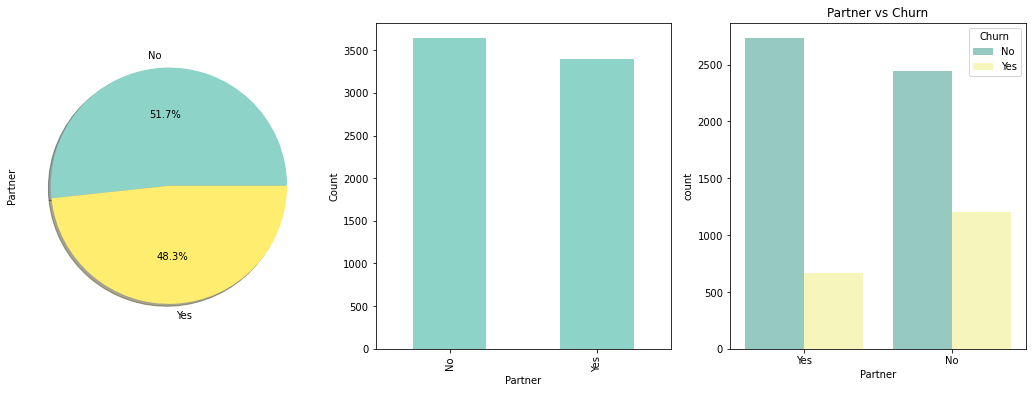

In [15]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Partner'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Partner'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Partner')
sns.countplot('Partner', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('Partner vs Churn')

We can see that teh churn is customers with no partners is little higher than customers with partners.

**Dependents**

In [16]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

We can see that 2110 customers have dependants and 4933 have no dependants.

**Checking Churn by Dependents**

Text(0.5, 1.0, 'Dependents vs Churn')

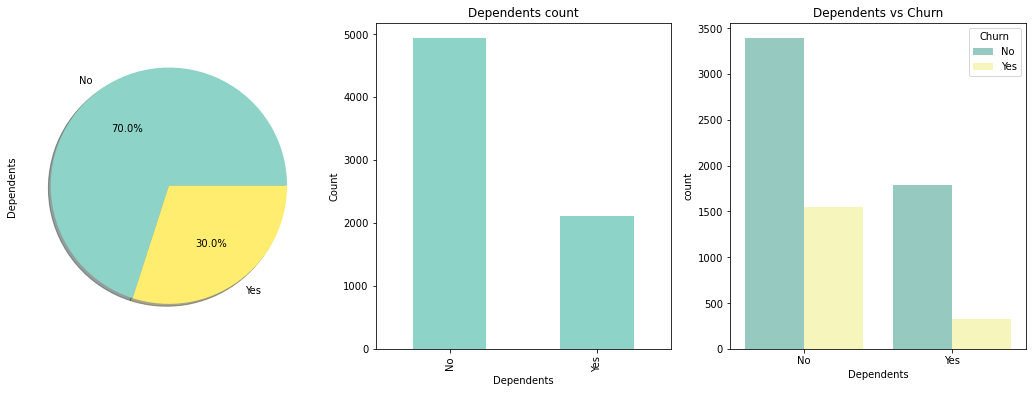

In [17]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Dependents'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Dependents count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Dependents')
sns.countplot('Dependents', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('Dependents vs Churn')

The percentaage of Churn in Customers with Dependants is lesser than the customers without Depandants.

**PhoneService**

In [18]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

6361 customers have Phone Service and 682 customers do not have phone service.

**Checking Churn by PhoneService**

Text(0.5, 1.0, 'PhoneService vs Churn')

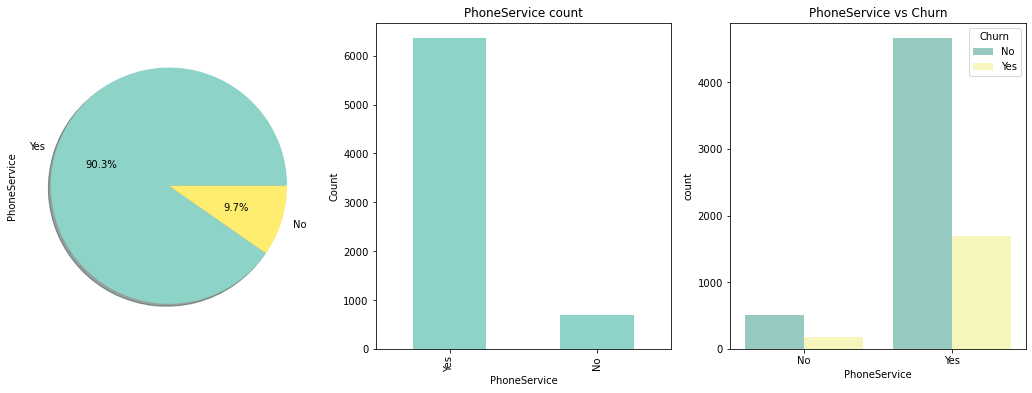

In [19]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['PhoneService'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('PhoneService count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('PhoneService')
sns.countplot('PhoneService', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('PhoneService vs Churn')

**MultipleLines**

In [20]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

**Checking Churn by MultipleLines**

Text(0.5, 1.0, 'MultipleLines vs Churn')

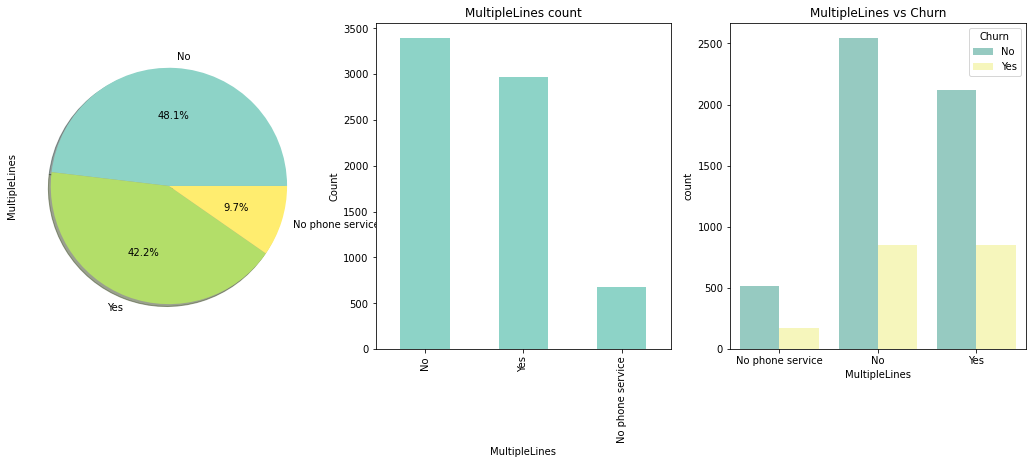

In [21]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['MultipleLines'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('MultipleLines count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('MultipleLines')
sns.countplot('MultipleLines', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('MultipleLines vs Churn')

**InternetService**

In [22]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

**Checking Churn by InternetService**

Text(0.5, 1.0, 'InternetService vs Churn')

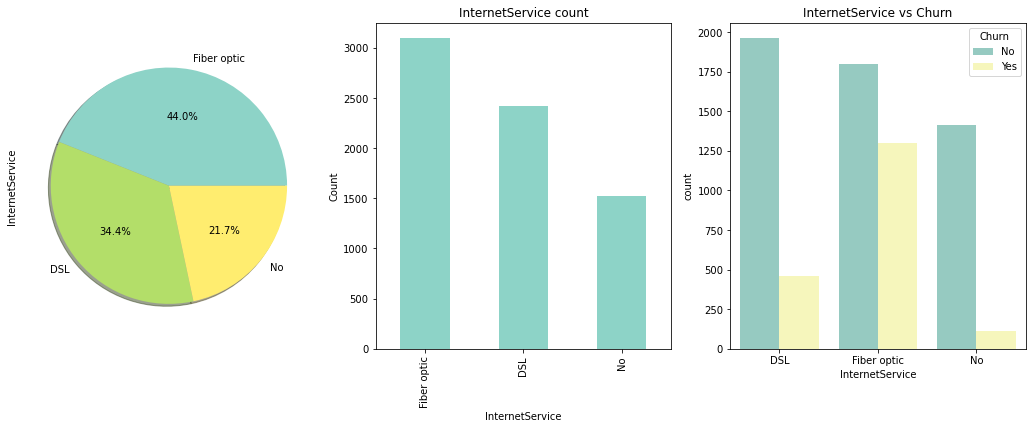

In [23]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['InternetService'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('InternetService count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('InternetService')
sns.countplot('InternetService', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('InternetService vs Churn')

**OnlineSecurity**

In [24]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

**Checking Churn by OnlineSecurity**

Text(0.5, 1.0, 'OnlineSecurity vs Churn')

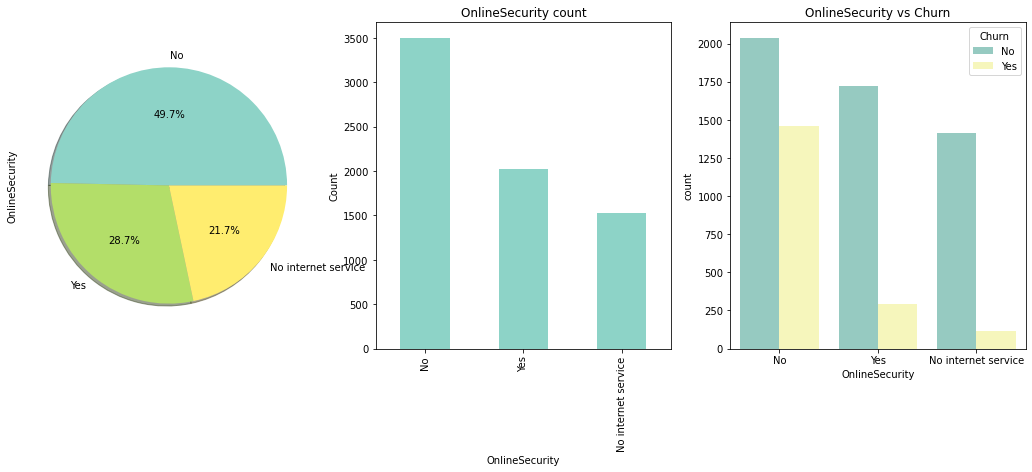

In [25]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['OnlineSecurity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['OnlineSecurity'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('OnlineSecurity count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('OnlineSecurity')
sns.countplot('OnlineSecurity', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('OnlineSecurity vs Churn')

**OnlineBackup**

In [26]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

**Checking Churn by OnlineBackup**

Text(0.5, 1.0, 'OnlineBackup vs Churn')

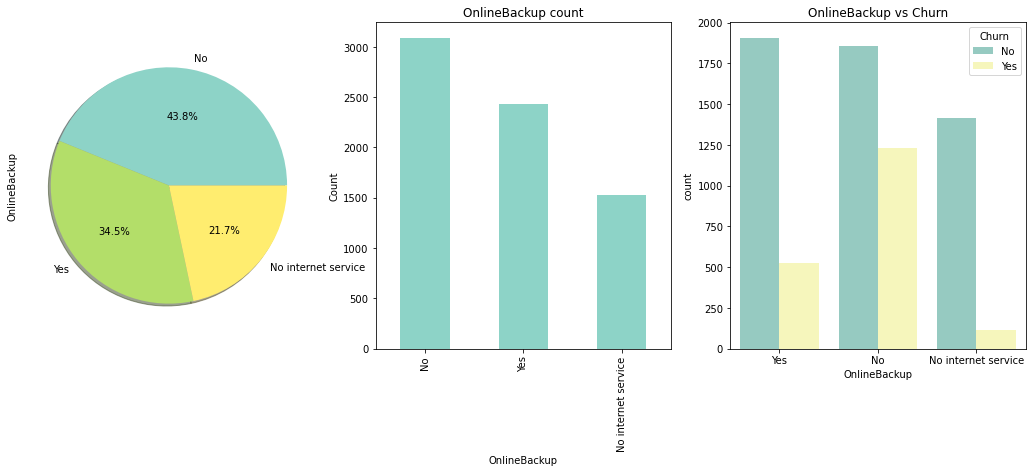

In [27]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['OnlineBackup'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['OnlineBackup'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('OnlineBackup count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('OnlineBackup')
sns.countplot('OnlineBackup', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('OnlineBackup vs Churn')

**DeviceProtection**

In [28]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

**Checking Churn by DeviceProtection**

Text(0.5, 1.0, 'DeviceProtection vs Churn')

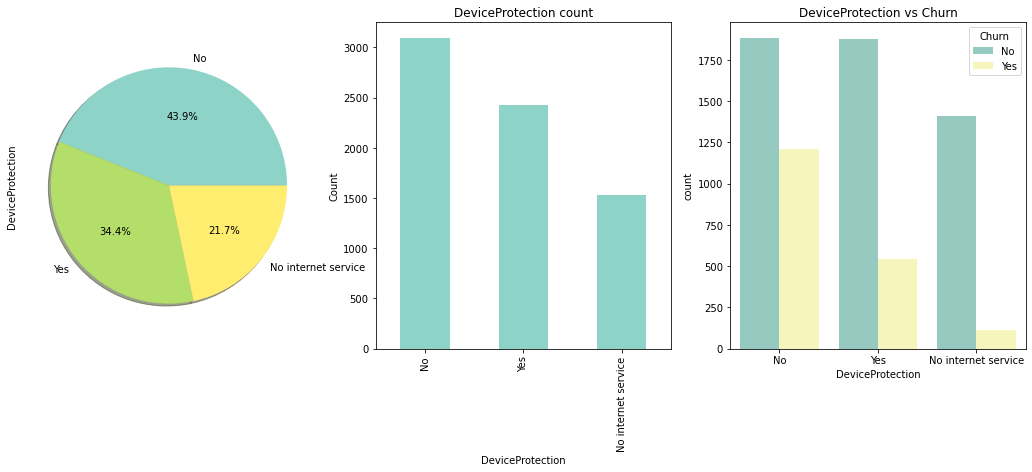

In [29]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['DeviceProtection'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('DeviceProtection count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('DeviceProtection')
sns.countplot('DeviceProtection', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('DeviceProtection vs Churn')

**TechSupport**

In [30]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

**Checking Churn by TechSupport**

Text(0.5, 1.0, 'TechSupport vs Churn')

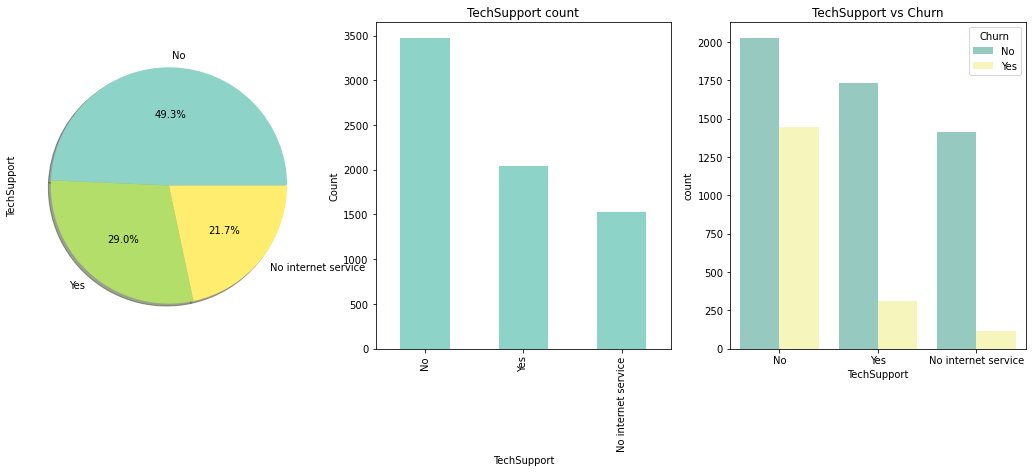

In [31]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['TechSupport'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('TechSupport count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('TechSupport')
sns.countplot('TechSupport', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('TechSupport vs Churn')

**StreamingTV**

In [32]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

**Checking Churn by StramingTV**

Text(0.5, 1.0, 'StreamingTV vs Churn')

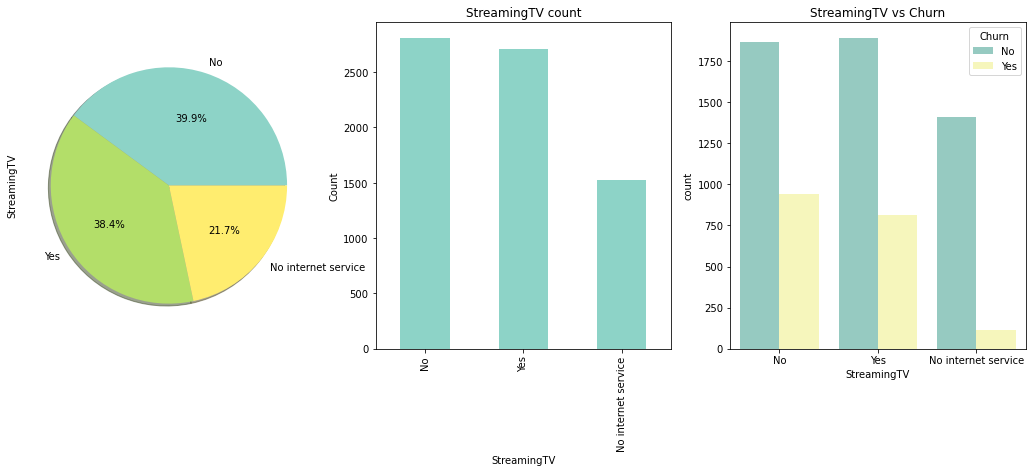

In [33]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['StreamingTV'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['StreamingTV'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('StreamingTV count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('StreamingTV')
sns.countplot('StreamingTV', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('StreamingTV vs Churn')

**StreamingMovies**

In [34]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

**Checking Churn by StreamingMovies**

Text(0.5, 1.0, 'StreamingMovies vs Churn')

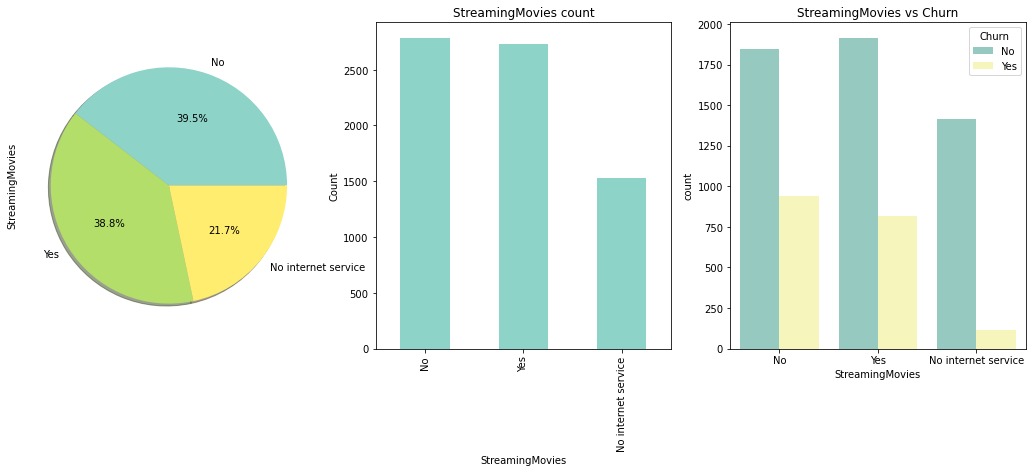

In [35]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['StreamingMovies'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['StreamingMovies'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('StreamingMovies count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('StreamingMovies')
sns.countplot('StreamingMovies', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('StreamingMovies vs Churn')

**Contract**

In [36]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

**Checking Churn by Contract**

Text(0.5, 1.0, 'Contract vs Churn')

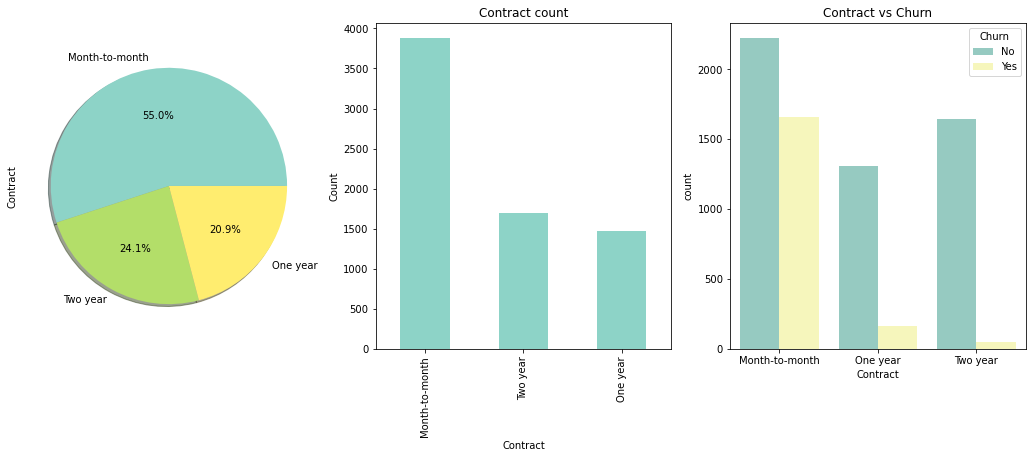

In [37]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Contract'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Contract count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Contract')
sns.countplot('Contract', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('Contract vs Churn')

**PaperlessBilling**

In [38]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

**Checking Churn by PaperlessBilling**

Text(0.5, 1.0, 'PaperlessBilling vs Churn')

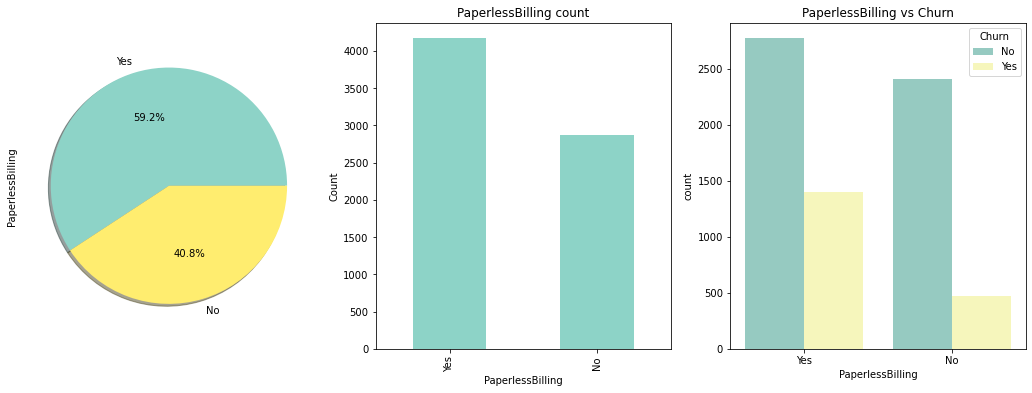

In [39]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['PaperlessBilling'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('PaperlessBilling count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('PaperlessBilling')
sns.countplot('PaperlessBilling', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('PaperlessBilling vs Churn')

**PaymentMethod**

In [40]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

**Checking Churn by PaymentMethod**

Text(0.5, 1.0, 'PaperlessBilling vs Churn')

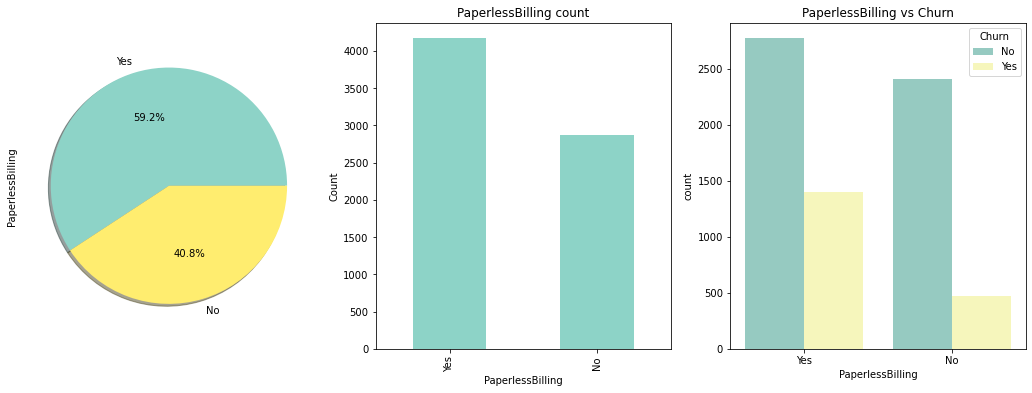

In [41]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['PaperlessBilling'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('PaperlessBilling count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('PaperlessBilling')
sns.countplot('PaperlessBilling', hue='Churn',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('PaperlessBilling vs Churn')

### Data Pre-Processing 

---> Churn

In [42]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
df['Churn'].replace({"No": 0, "Yes": 1}, inplace = True)

--->gender

In [44]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [45]:
df['gender'].replace({"Female": 0, "Male": 1}, inplace = True)

--->Partner

In [46]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
df['Partner'].replace({"No": 0, "Yes": 1}, inplace = True)

---> Dependents

In [48]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df['Dependents'].replace({"No": 0, "Yes": 1}, inplace = True)

--->PhoneService

In [50]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
df['PhoneService'].replace({"No": 0, "Yes": 1}, inplace = True)

--->MultipleLines

In [52]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [53]:
df['MultipleLines'].replace({"No": 0, "Yes": 1, "No phone service":2}, inplace = True)

--->InternetService

In [54]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [55]:
df['InternetService'].replace({"No": 0, "DSL": 1, "Fiber optic":2}, inplace = True)

--->OnlineSecurity

In [56]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [57]:
df['OnlineSecurity'].replace({"No": 0, "Yes": 1, "No internet service":2}, inplace = True)

--->OnlineBackup

In [58]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [59]:
df['OnlineBackup'].replace({"No": 0, "Yes": 1, "No internet service":2}, inplace = True)

--->DeviceProtection

In [60]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [61]:
df['DeviceProtection'].replace({"No": 0, "Yes": 1, "No internet service":2}, inplace = True)

--->TechSupport

In [62]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [63]:
df['TechSupport'].replace({"No": 0, "Yes": 1, "No internet service":2}, inplace = True)

--->StreamingTV

In [64]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [65]:
df['StreamingTV'].replace({"No": 0, "Yes": 1, "No internet service":2}, inplace = True)

--->StreamingMovies

In [66]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [67]:
df['StreamingMovies'].replace({"No": 0, "Yes": 1, "No internet service":2}, inplace = True)

--->Contract

In [68]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [69]:
df['Contract'].replace({"Month-to-month": 0, "One year": 1, "Two year":2}, inplace = True)

--->PaperlessBilling

In [70]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [71]:
df['PaperlessBilling'].replace({"No": 0, "Yes": 1}, inplace = True)

--->PaymentMethod

In [72]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [73]:
df['PaymentMethod'].replace({"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)":2, "Credit card (automatic)":3}, inplace = True)

--->SeniorCitizen

In [74]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [75]:
df.groupby(by='SeniorCitizen').agg('count')

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,,,,,,,,,,,,,,,,,,,,
0,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901
1,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142


We can see that the percentage senior citizens is less when compared to non-SeniorCitizen in the data. This is not going to affect the data much. Hence dropping this column.

In [76]:
# dropping SeniorCitizen column
df=df.drop('SeniorCitizen', axis=1)

We know that the total charges are the sum of the charges for the services taken multiplied by number of months(tenure) for which the service is availed. As we have all the other information, dropping this column. 

In [77]:
# dropping TotalCharges column
df=df.drop('TotalCharges', axis=1)

Also, we know that the customerID do not affect the prediction of the model. So dropping this column.

In [78]:
# dropping customerID column
df=df.drop('customerID', axis=1)

In [79]:
df.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,0
1,1,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,0
2,1,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,1
3,1,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,0
4,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,1


In [80]:
df.describe()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,0.265370
std,0.500013,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


<Figure size 1728x720 with 0 Axes>

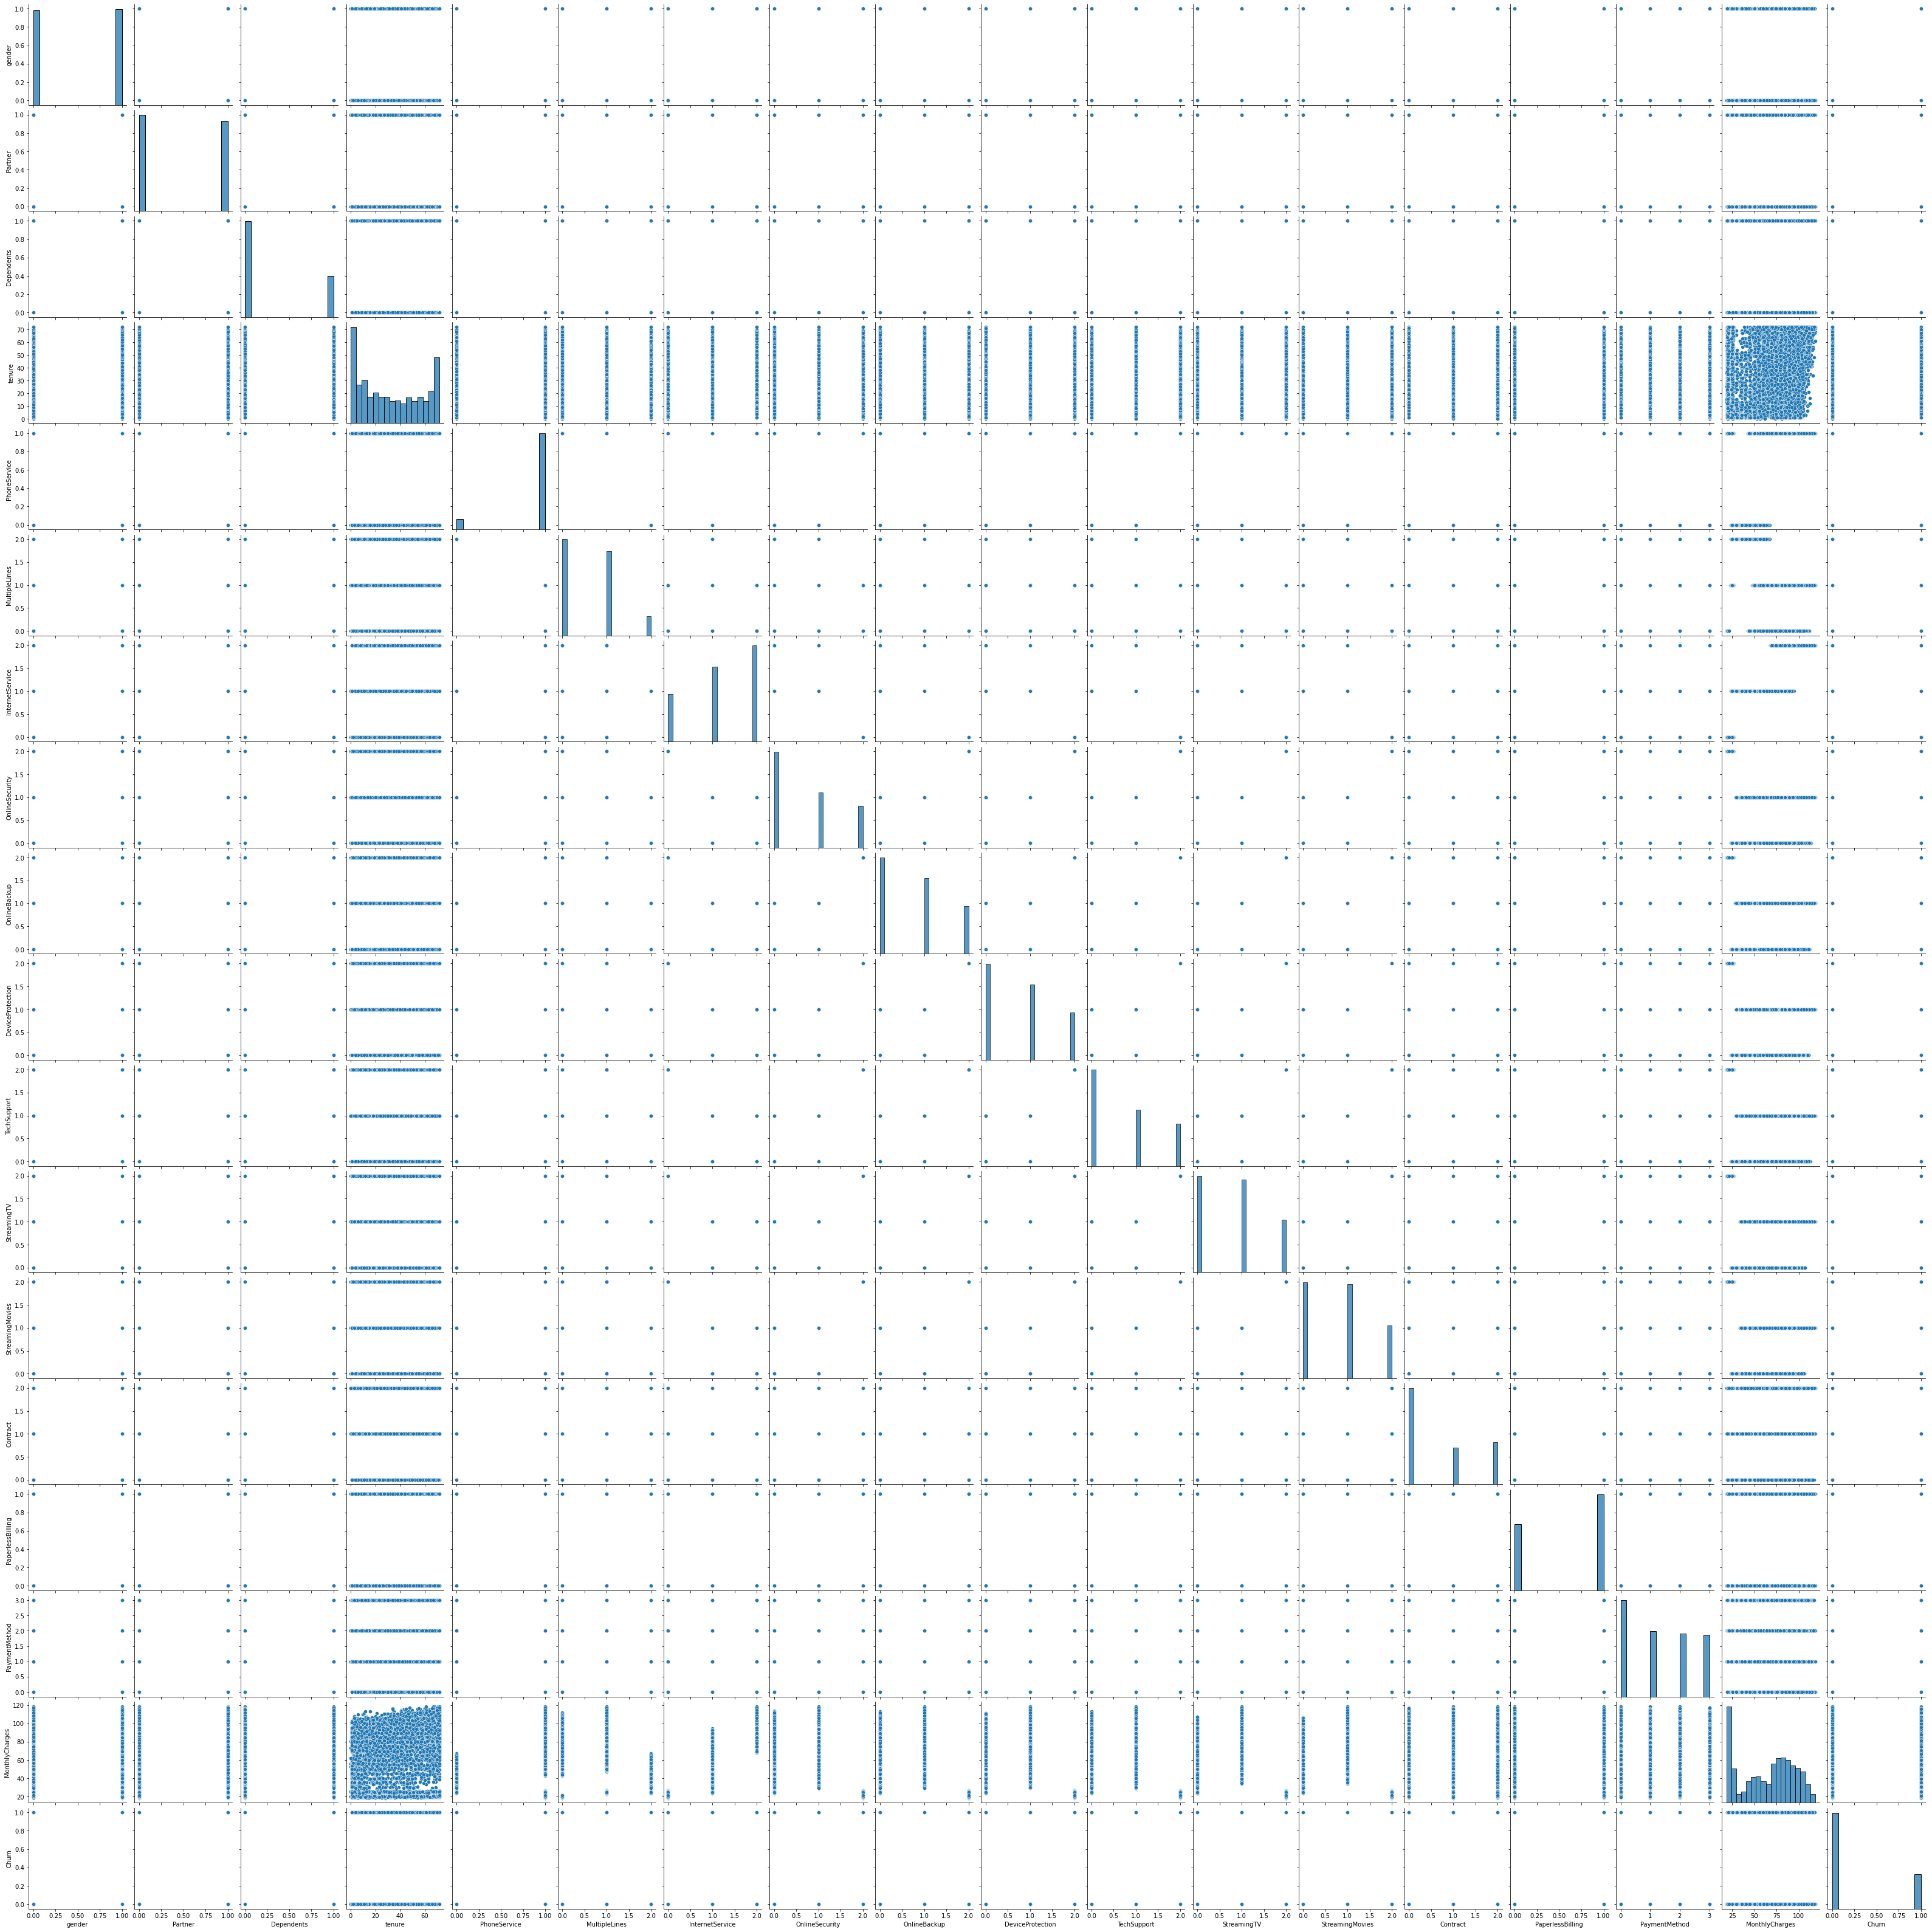

In [81]:
figure = plt.figure(figsize=(24,10))
sns.pairplot(df)
plt.show()

**Correlation**

In [82]:
df.corr()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.010380,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,0.000126,-0.011754,-0.005209,-0.014569,-0.008612
Partner,-0.001808,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,0.133115,0.096848,-0.150448
Dependents,0.010517,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,0.123844,-0.113890,-0.164221
tenure,0.005106,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,0.340305,0.247900,-0.352229
PhoneService,-0.006488,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,-0.004070,0.247398,0.011942
MultipleLines,-0.000485,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,0.030659,0.146153,0.019423
InternetService,-0.010380,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.290189,0.378108,-0.178137,0.905491,0.316846
OnlineSecurity,-0.003429,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,0.213800,-0.621227,-0.332819
OnlineBackup,-0.002032,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.262402,0.182909,-0.538454,-0.291449
DeviceProtection,0.005092,0.094451,0.156439,0.178649,0.138755,-0.200463,-0.682448,0.749040,0.740604,1.000000,0.767970,0.763279,0.766821,0.390216,-0.276326,0.191746,-0.513440,-0.281465


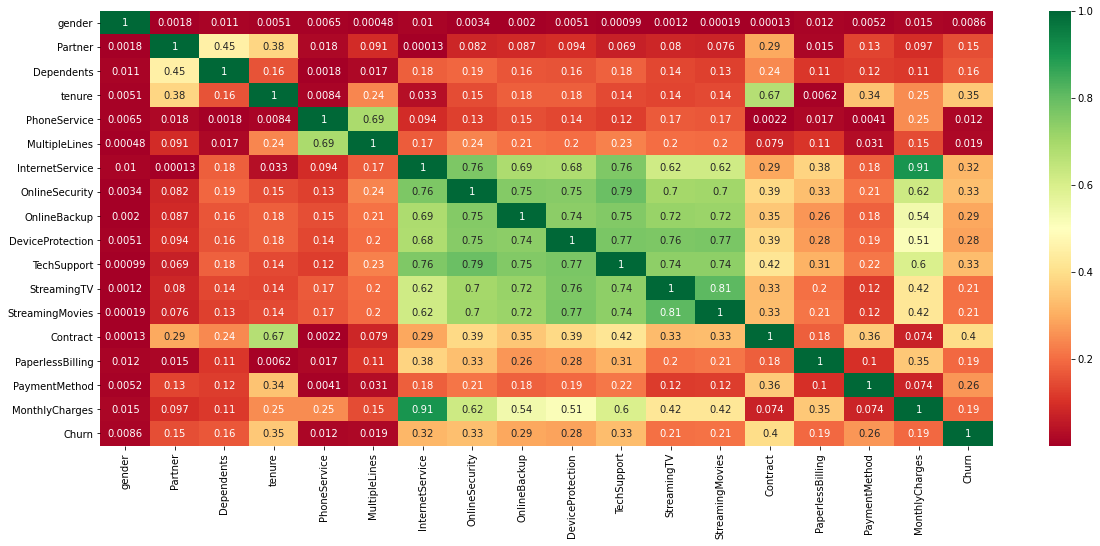

In [83]:
data_corr = df.corr().abs()
plt.figure(figsize=(20, 8))
sns.heatmap(data_corr, annot=True,cmap='RdYlGn')
plt.show()

**Skewness**

In [84]:
df.skew()

gender             -0.019031
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.597817
InternetService    -0.410327
OnlineSecurity      0.544240
OnlineBackup        0.407747
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod       0.218405
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

We can see that PhoneService has highest skewness followed by Churn while the skewness is least in gender followed by 0.067922. Most of the data of this dataset varies between no skewness to moderate skewness.

**Outliers**

<AxesSubplot:>

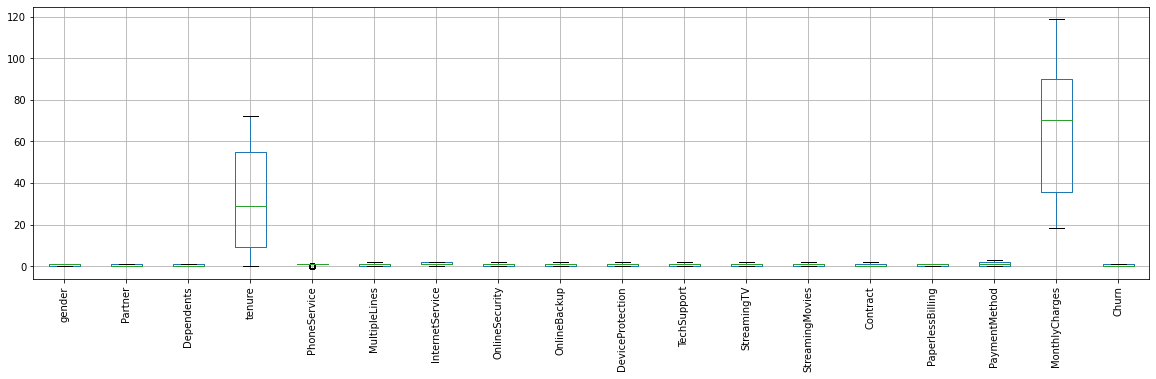

In [85]:
df.boxplot( rot = 90, figsize=(20,5))

We can see that there are no considerable outliers in the data.

### Predictive Modeling

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

**Splitting data for validation**

In [87]:
X=df.drop(['Churn'], axis=1)
y=df['Churn']

In [88]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [89]:
print(X_train.shape, y_train.shape)

(4930, 17) (4930,)


**-----> Checking Accuracies**

In [90]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)


model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)

model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
prediction_svm_l = model_svm_l.predict(X_test)

model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)

model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)

In [91]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_test))
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the Logistic Regression is 0.8106956933270232
The accuracy of the Decision Tree is  0.7269285376242309
The accuracy of the  K-Nearest Neighbours is  0.7605300520586843
The accuracy of the Linear Support Vector Machine is  0.8092759110269758
The accuracy of the  Random Forest is  0.7875059157595835
The accuracy of the  Gaussian Naive Bayes is  0.7079981069569332


**-----> Checking Cross Validation Scores**

In [92]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [93]:
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(model_log,X,y,cv=5)
scr2=cross_val_score(model_tree,X,y,cv=5)
scr3=cross_val_score(model_knn,X,y,cv=5)
scr4=cross_val_score(model_svm_l,X,y,cv=5)
scr5=cross_val_score(model_random,X,y,cv=5)
scr6=cross_val_score(model_gaus,X,y,cv=5)

In [94]:
print("Cross Validation Score of Logistic Regression Model:", scr1.mean())
print("Cross Validation Score of Decision Tree Model:", scr2.mean())
print("Cross Validation Score of K-Nearest Neighbours Model:", scr3.mean())
print("Cross Validation Score of Linear Support Vector Machine Model:", scr4.mean())
print("Cross Validation Score of Random Forest Model:", scr5.mean())
print("Cross Validation Score of Gaussian Naive Bayes Model:", scr6.mean())

Cross Validation Score of Logistic Regression Model: 0.8027837481450417
Cross Validation Score of Decision Tree Model: 0.7232702513065359
Cross Validation Score of K-Nearest Neighbours Model: 0.7728230450351635
Cross Validation Score of Linear Support Vector Machine Model: 0.8006529655139042
Cross Validation Score of Random Forest Model: 0.785035728111491
Cross Validation Score of Gaussian Naive Bayes Model: 0.7004112160461966


<br>
---> We can see that the difference between Accuracy and Cross Validation Score is almost the same for all the models.

**Confusion Matrix for the above models**

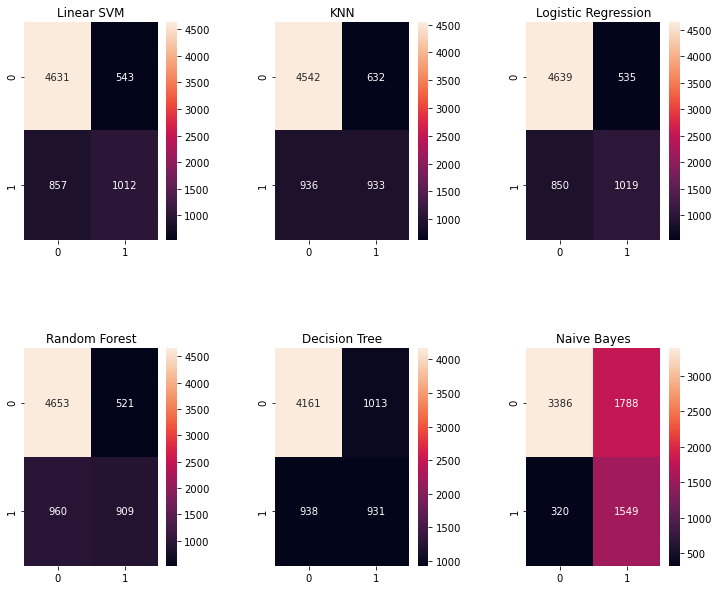

In [95]:
f, ax  =plt.subplots(2,3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,0], annot=True,fmt='2.0f')
ax[0,0].set_title('Linear SVM')


y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9) ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,1], annot=True,fmt='2.0f')
ax[0,1].set_title('KNN')

y_pred = cross_val_predict(LogisticRegression(solver='liblinear') ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,2], annot=True,fmt='2.0f')
ax[0,2].set_title('Logistic Regression')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100) ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,0], annot=True,fmt='2.0f')
ax[1,0].set_title('Random Forest')

y_pred = cross_val_predict(DecisionTreeClassifier() ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Decision Tree')

y_pred = cross_val_predict(GaussianNB() ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,2], annot=True,fmt='2.0f')
ax[1,2].set_title('Naive Bayes')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

* We can see that Random Forest Model has a higher chance in correcly predicting the churn.<br>
  ---> 4647 for non Churn and 917 for Churn predicted correctly.

### ROC Curve

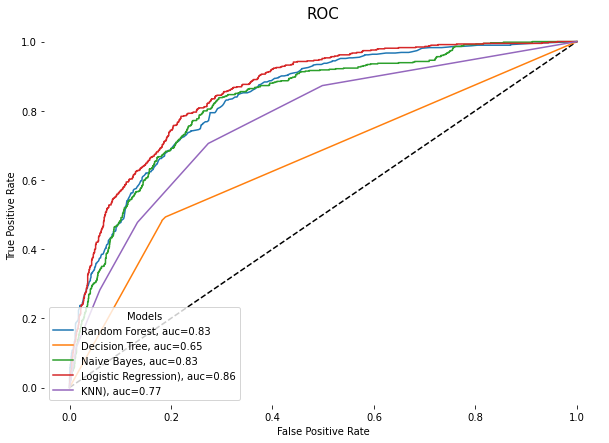

In [96]:
y_pred_proba_RF = model_random.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = model_tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_NB = model_gaus.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_NB)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_NB)

y_pred_proba_LR = model_log.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_KNN = model_knn.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_KNN)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_KNN)


plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Naive Bayes, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Logistic Regression), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="KNN), auc="+str(round(auc5,2)))

plt.legend(loc=3, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Hyper Parameter Tuning

**---> Random Forest Model**

In [97]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed: 11.7min finished


0.7892946722369185
RandomForestClassifier(n_estimators=750, random_state=0)


In [98]:
gd.best_params_

{'n_estimators': 750}

In [99]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.06526367213191407

**--->Logistic Regression**

In [100]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.8023576117814052


**--->Decision Tree Regression Model**

In [101]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [102]:
tuning_model=GridSearchCV(model_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [103]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [104]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [105]:
from sklearn.tree import DecisionTreeRegressor
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [106]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [107]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

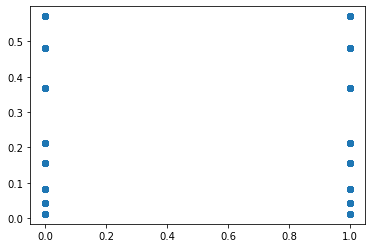

In [108]:
plt.scatter(y_test,tuned_pred)

In [109]:
# With hyperparameter tuned Decision Tree Model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.30245717870384736
MSE: 0.14873035485725403
RMSE: 0.3856557465632452


We can see that the Random Forest Model got the least RMSE score in these three hypertuned models.

### Predictions

In [110]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
OutputDF.head()

,Actual Data,Predicted Data
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0


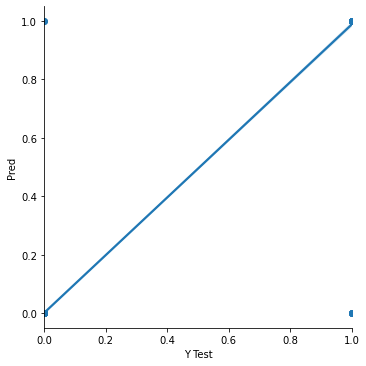

In [111]:
OutputDF = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=OutputDF,palette='rainbow')

### Saving the Model

In [112]:
import joblib

In [113]:
joblib.dump(model_random, 'customer_churn_analysis.pkl')

['customer_churn_analysis.pkl']

In [114]:
# Load the model from the file
model_random_from_joblib = joblib.load('customer_churn_analysis.pkl')

In [115]:
# Use the loaded model to make predictions
model_random_from_joblib.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)